In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

def profiling_report(df):
    !pip install pandas-profiling
    from pandas_profiling import ProfileReport
    return ProfileReport(df)
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

    #helps to make a full report
    profiling_report(df)


In [4]:
df = pd.read_csv(r'C:\Users\mohit\OneDrive\Desktop\omdena-pakistan-covid-analysis\Data\Covid19-Cleaned-Data\csse_covid19_daily_reports_cleaned.csv')

In [5]:
df.head()

,index,year,Province,country,updated_dates,latitude,longitude,confirmed,deaths,recovered,active,incident,fatality
0,0,2021,Sindh,Pakistan,2021-01-02,26.009446,68.776807,216632.0,3582.0,196134.0,16916.0,452.390614,1.653495
1,1,2021,Sindh,Pakistan,2021-01-03,26.009446,68.776807,217636.0,3594.0,196677.0,17365.0,454.487258,1.651381
2,2,2021,Sindh,Pakistan,2021-01-04,26.009446,68.776807,218597.0,3611.0,197430.0,17556.0,456.494105,1.651898
3,3,2021,Sindh,Pakistan,2021-01-05,26.009446,68.776807,219452.0,3623.0,197870.0,17959.0,458.279594,1.650930
4,4,2021,Sindh,Pakistan,2021-01-06,26.009446,68.776807,220501.0,3634.0,198577.0,18290.0,460.470211,1.648065


In [7]:
df.isnull().sum()

index              0
year               0
Province           0
country            0
updated_dates      0
latitude           0
longitude          0
confirmed          0
deaths             0
recovered        637
active           637
incident           0
fatality           0
dtype: int64

In [8]:
df.shape

(3584, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          3584 non-null   int64  
 1   year           3584 non-null   int64  
 2   Province       3584 non-null   object 
 3   country        3584 non-null   object 
 4   updated_dates  3584 non-null   object 
 5   latitude       3584 non-null   float64
 6   longitude      3584 non-null   float64
 7   confirmed      3584 non-null   float64
 8   deaths         3584 non-null   float64
 9   recovered      2947 non-null   float64
 10  active         2947 non-null   float64
 11  incident       3584 non-null   float64
 12  fatality       3584 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 364.1+ KB


In [13]:
# AS both recovered and active columns are very important columns for us so we can't remove  those columns
# It's better to just fill those NAN cells

df['recovered'].fillna(df['recovered'].mean(), inplace = True)
#df['active'] = df.fillna(df['active'].mean())


In [14]:
df['active'].fillna(df['active'].mean(), inplace = True)

In [15]:
df.isnull().sum()

index            0
year             0
Province         0
country          0
updated_dates    0
latitude         0
longitude        0
confirmed        0
deaths           0
recovered        0
active           0
incident         0
fatality         0
dtype: int64

In [20]:
df.nunique()

index            3584
year                2
Province            7
updated_dates     512
latitude            7
longitude           8
confirmed        3396
deaths           1970
recovered        2711
active           2237
incident         3399
fatality         3397
dtype: int64

In [18]:
col = df.columns
df.drop([col[3]] , axis=1 , inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          3584 non-null   int64  
 1   year           3584 non-null   int64  
 2   Province       3584 non-null   object 
 3   updated_dates  3584 non-null   object 
 4   latitude       3584 non-null   float64
 5   longitude      3584 non-null   float64
 6   confirmed      3584 non-null   float64
 7   deaths         3584 non-null   float64
 8   recovered      3584 non-null   float64
 9   active         3584 non-null   float64
 10  incident       3584 non-null   float64
 11  fatality       3584 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 336.1+ KB


In [21]:
# EDA 

# EDA

In [22]:
categorical_eda(df)


To check: 
Unique count of non-numeric data

Province           7
updated_dates    512
dtype: int64
Top 5 unique values of Province
             Province  Count
0               Sindh    512
1              Punjab    512
2           Islamabad    512
3  Khyber Pakhtunkhwa    512
4         Balochistan    512
 
Top 5 unique values of updated_dates
  updated_dates  Count
0    2021-01-02      7
1    2021-01-03      7
2    2020-07-23      7
3    2020-07-22      7
4    2020-07-21      7
 


In [23]:
top5(df)

Top 5 unique values of Province
             Province  Count
0               Sindh    512
1              Punjab    512
2           Islamabad    512
3  Khyber Pakhtunkhwa    512
4         Balochistan    512
 
Top 5 unique values of updated_dates
  updated_dates  Count
0    2021-01-02      7
1    2021-01-03      7
2    2020-07-23      7
3    2020-07-22      7
4    2020-07-21      7
 



To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
index,3584.0,1791.500000,1034.756010,0.000000,895.750000,1791.500000,2687.250000,3583.000000
year,3584.0,2020.601562,0.489645,2020.000000,2020.000000,2021.000000,2021.000000,2021.000000
latitude,3584.0,31.874179,3.340888,26.009446,28.328492,33.665087,34.485332,35.792146
longitude,3584.0,71.565235,2.934572,65.898403,68.776807,72.139132,73.947253,74.982138
confirmed,3584.0,94213.907645,118279.681524,444.000000,12516.250000,35209.000000,131801.250000,470978.000000
deaths,3584.0,2070.772600,2894.014597,9.000000,175.000000,681.500000,2829.750000,12936.000000
recovered,3584.0,69822.325755,79608.881730,217.000000,12377.000000,47167.500000,81523.500000,339379.000000
active,3584.0,5935.375976,8359.487916,0.000000,664.750000,3363.500000,5935.375976,49980.000000
incident,3584.0,669.950467,1046.790887,10.975521,152.259225,314.053114,608.497743,5333.573876
fatality,3584.0,2.026814,0.798536,0.862061,1.126191,2.029293,2.804358,4.199078


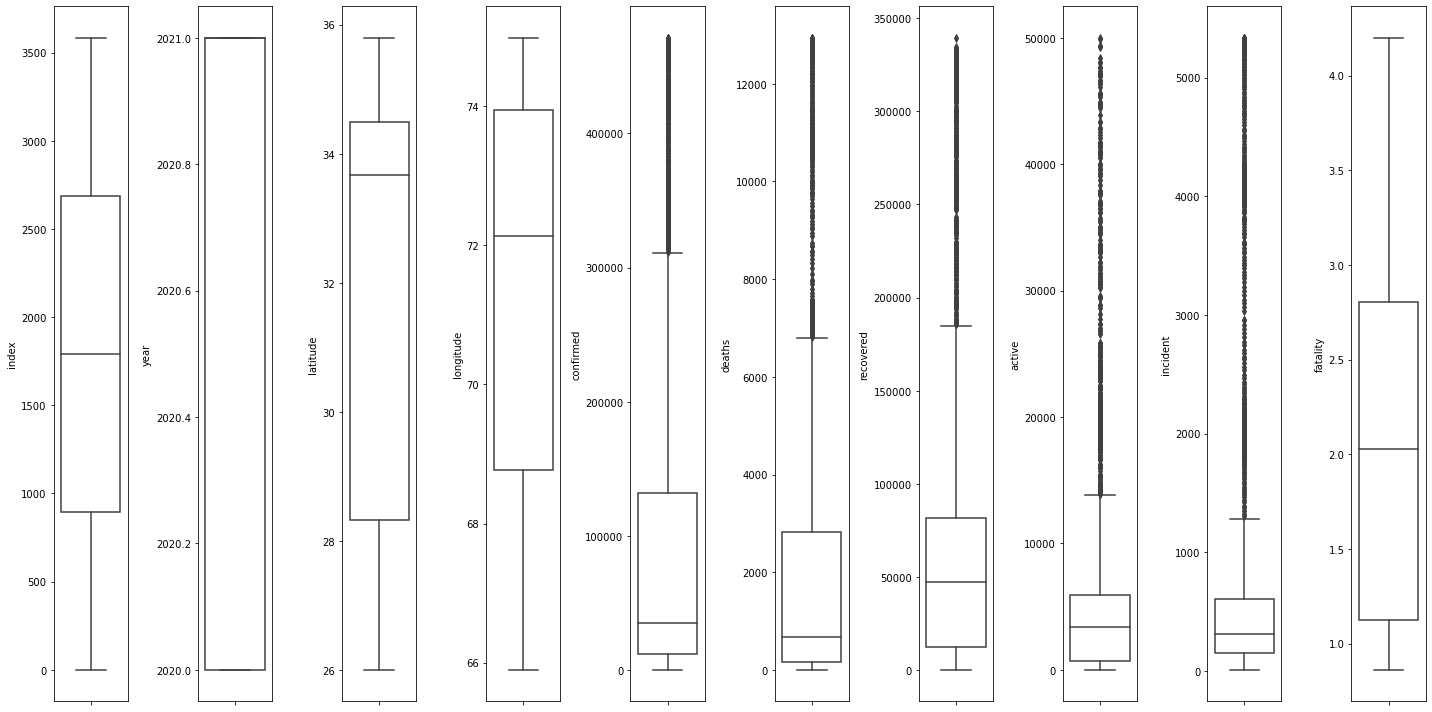


To check pairwise joint distribution of numeric data


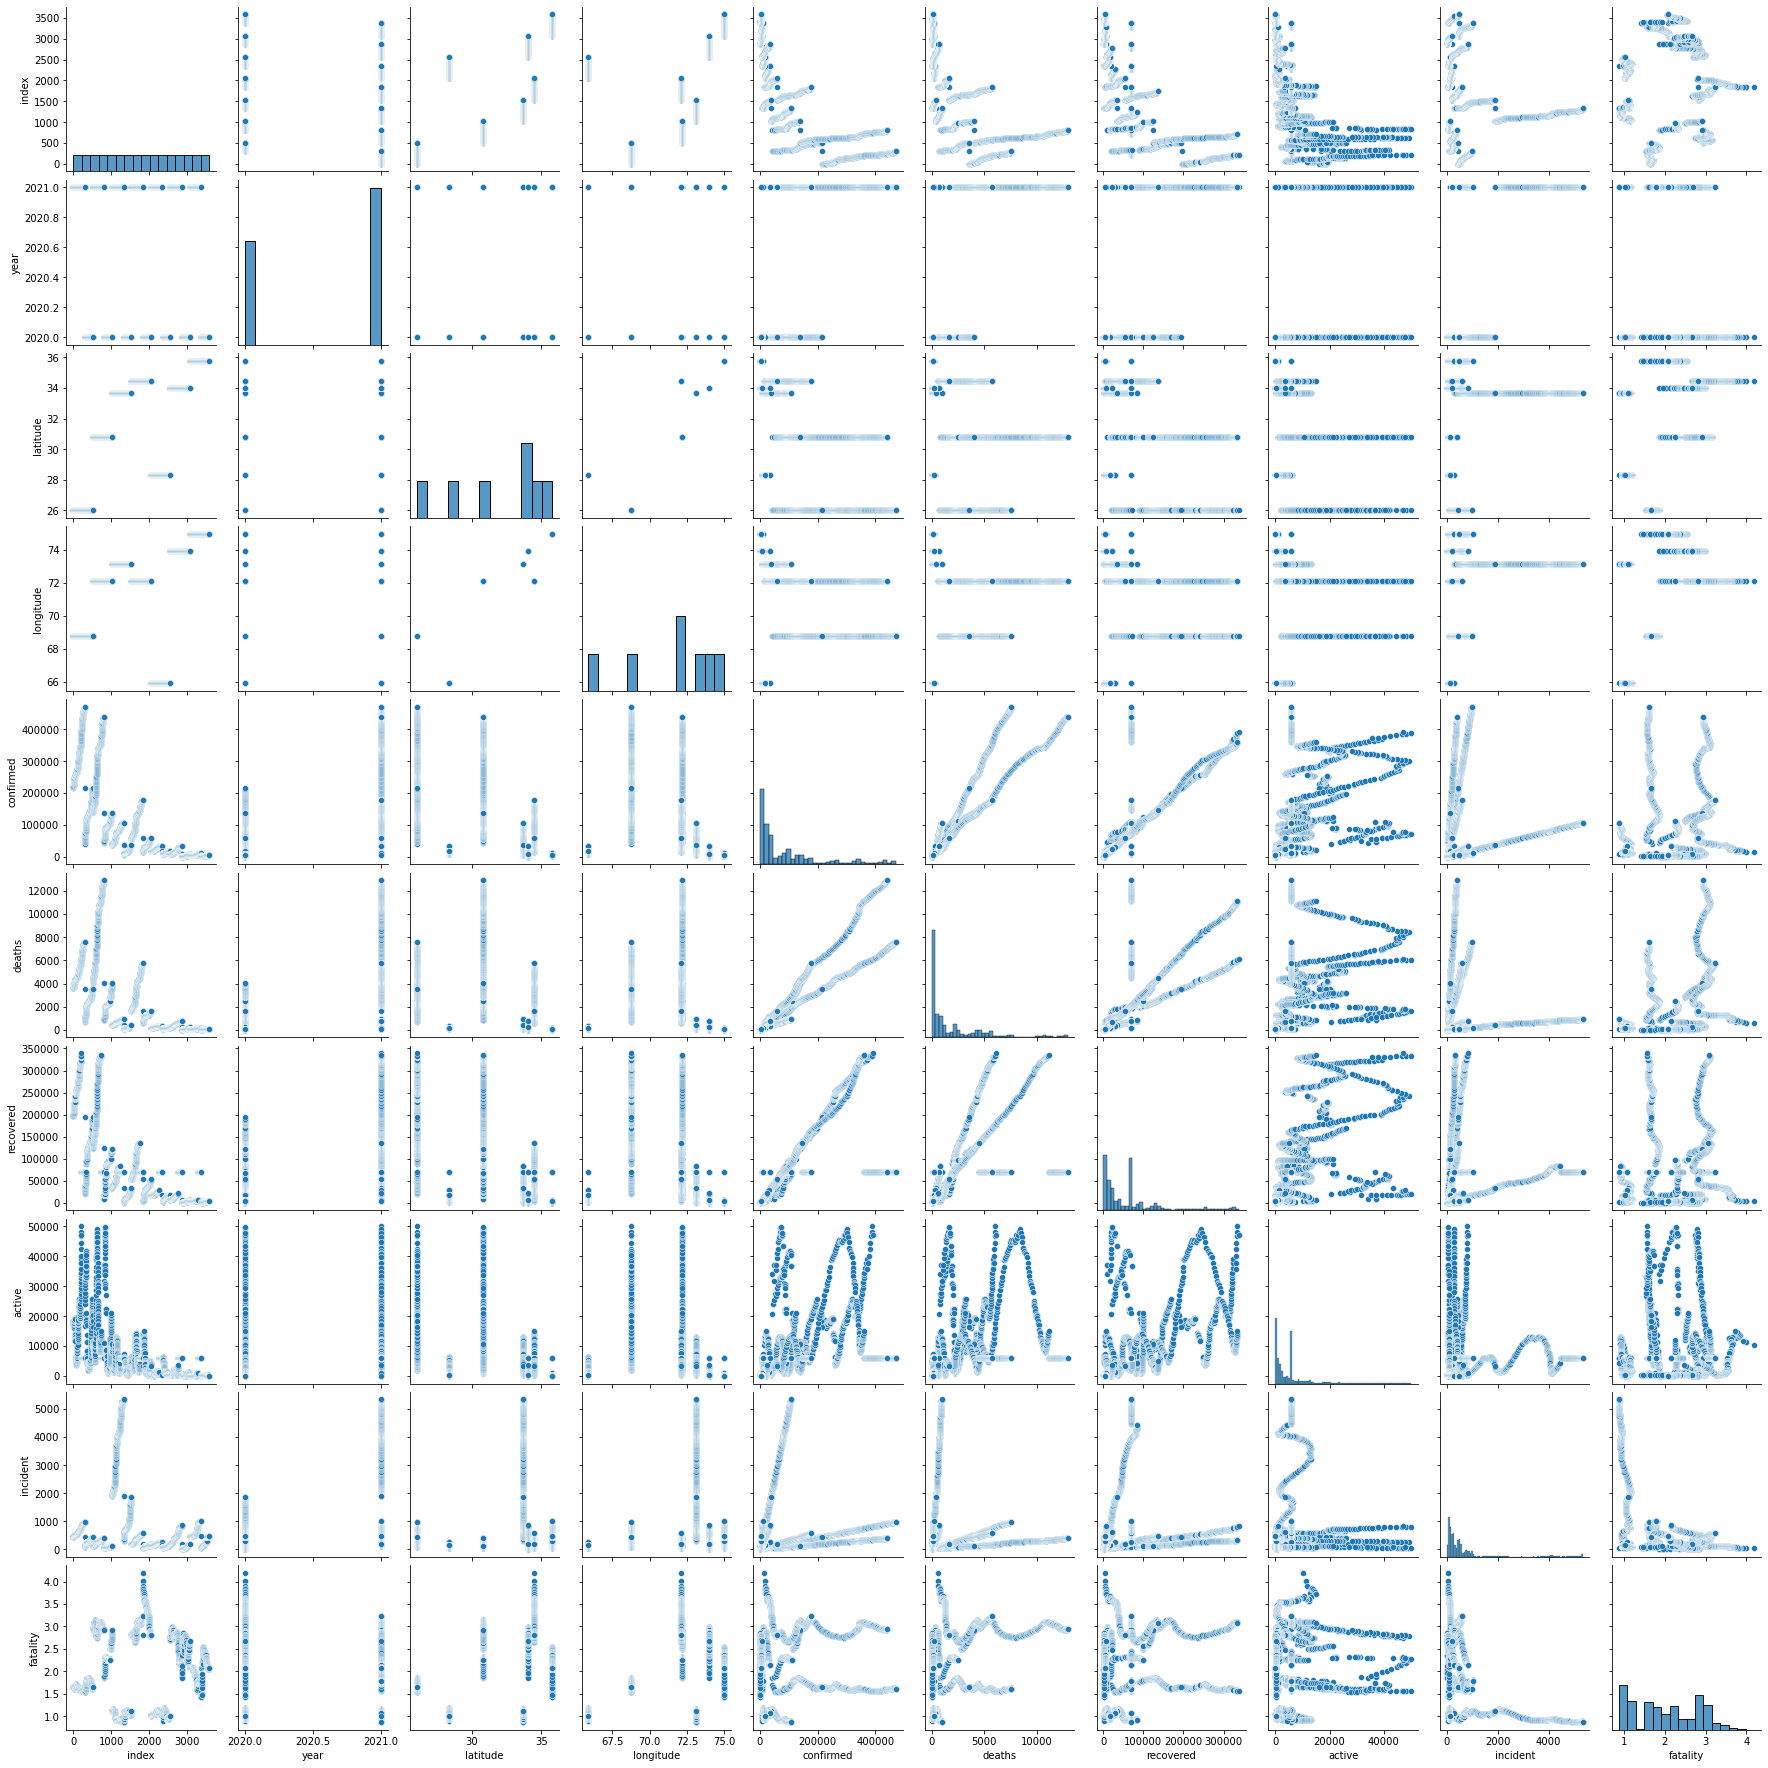

In [24]:
numeric_eda(df)

In [25]:
report = profiling_report(df)

You should consider upgrading via the 'C:\Users\mohit\anaconda3\python.exe -m pip install --upgrade pip' command.


In [26]:
report.to_file('Daily_Report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 21.76it/s]


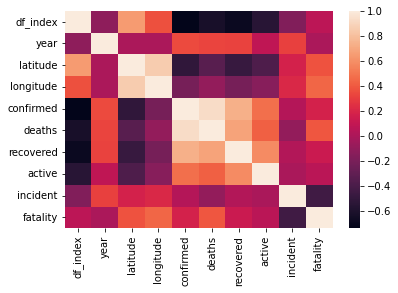

In [27]:
# plot heatmap
import seaborn as sns
ax = sns.heatmap(df.corr())

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('seabornPandas.png', dpi=100)
plt.show()